# Genetic Algorithm Solutions to Capacitated Vehicle Routing Problem

**PREREQUISITE: Some knowledge on Genetic Algorithm**

Here we provide the python code from the article "Route Splitting and Adaptive Mutation in Genetic Algorithms for the Capacitated Vehicle Routing Problem"

## Capacitated Vehicle Routing Problem (CVRP)

The Capacitated Vehicle Routing Problem (CVRP) is a classic optimization problem in logistics and transportation. The goal is to determine the most efficient routes for a fleet of vehicles to deliver goods to a set of customers. Each vehicle has a fixed carrying capacity, and each customer has a specific demand. The objective is to minimize the total distance traveled or the total cost, while ensuring that the sum of the demands on any route does not exceed the vehicle’s capacity.

## Genetic Algorithm (GA)

A Genetic Algorithm (GA) is a search heuristic inspired by the process of natural selection. It is used to solve optimization and search problems by mimicking the principles of biological evolution, such as selection, crossover, and mutation.

Key components of a Genetic Algorithm:

	1.	Population: A set of potential solutions to the problem.
	2.	Selection: The process of choosing individuals from the population based on their fitness scores.
	3.	Crossover (Recombination): Combining two selected individuals to produce offspring with characteristics of both parents.
	4.	Mutation: Introducing small random changes to individuals to maintain genetic diversity.
	5.	Fitness Function: A function that evaluates how well an individual solves the problem.

For a more detailed explanation on GA, you can refer to https://www.geeksforgeeks.org/genetic-algorithms/

## Mathematical Formulation of CVRP


The mathematical formulation of the CVRP is presented below to provide a clear understanding of the problem constraints and objectives that our proposed genetic algorithm aims to solve.

### Parameters

- $G=(V,A)$: A graph where $V$ is the set of nodes (customers and depot) and $A$ is the set of arcs (routes between nodes).
- $V=\{0,1,2,\dots,n\}$: Set of nodes, where 0 is the depot and 1 to $n$ are the customers.
- $K$: Set of identical vehicles.
- $Q$: Capacity of each vehicle.
- $c_{ij}$: Cost of traveling from node $i$ to node $j$.
- $q_i$: Demand at customer $i$.

### Decision Variables

- $x_{ijk}=1$ if vehicle $k$ travels directly from the node $i$ to node $j$, and it is 0 otherwise.
- $y_{ik}$: Load of vehicle $k$ after visiting node $i$.

### Objective Function

Minimize the total cost:

$$
\text{minimize} \sum_{k \in K} \sum_{(i,j) \in A} c_{ij} x_{ijk}
$$

### Constraints

1. **Each customer is visited exactly once:**

$$
\sum_{k \in K} \sum_{j \in V, j \ne i} x_{ijk} = 1, \forall i \in \{1,2,\dots,n\}
$$

2. **Load constraint (sub-tour elimination):**

$$
y_{jk} \ge y_{ik} + q_j - Q (1 - x_{ijk}), \forall k \in K, (i,j) \in A, i \ne j, j \ne 0
$$

3. **Depot load constraint:**

$$
y_{0k} = 0, \forall k \in K
$$

4. **Vehicle capacity constraint:**

$$
0 \le y_{ik} \le Q, \forall k \in K, i \in V
$$

5. **Binary decision variable constraint:**

$$
x_{ijk} \in \{0,1\}, \forall k \in K, (i,j) \in A
$$

---


## CVRP Instances to be used as experiments

The following code snippet generates a random instance of the Capacitated Vehicle Routing Problem (CVRP). It uses the numpy library to create random coordinates for the depot and customer locations, along with random demands for each customer. The matplotlib library is used to visualize these locations.

Steps in the Code:

	1. Import Libraries: The necessary libraries, numpy and matplotlib.pyplot, are imported. seaborn imported to better visualisation.
	2. VRP_instance Function:
	  - This function creates a VRP instance with a specified number of customer points.
	  - It sets a seed for reproducibility of random numbers.
	  - Random coordinates for the depot (at index 0) and customer locations are generated.
	  - Random demands for each customer are generated, ensuring the depot has zero demand.
	  - Vehicle capacity is set, and the number of vehicles needed is calculated based on the total demand.
	3. Generate and Plot VRP Instance:
	  - The function is called with 20 customer points.
	  - The customer and depot locations are plotted on a graph, with the depot marked in red and customers in blue.
	  - The plot displays the spatial distribution of the depot and customers.
	4. Print Details:
	  - The number of customers, total demand, vehicle capacity, and the number of vehicles are printed.
	  - Print customer demands and coordinates

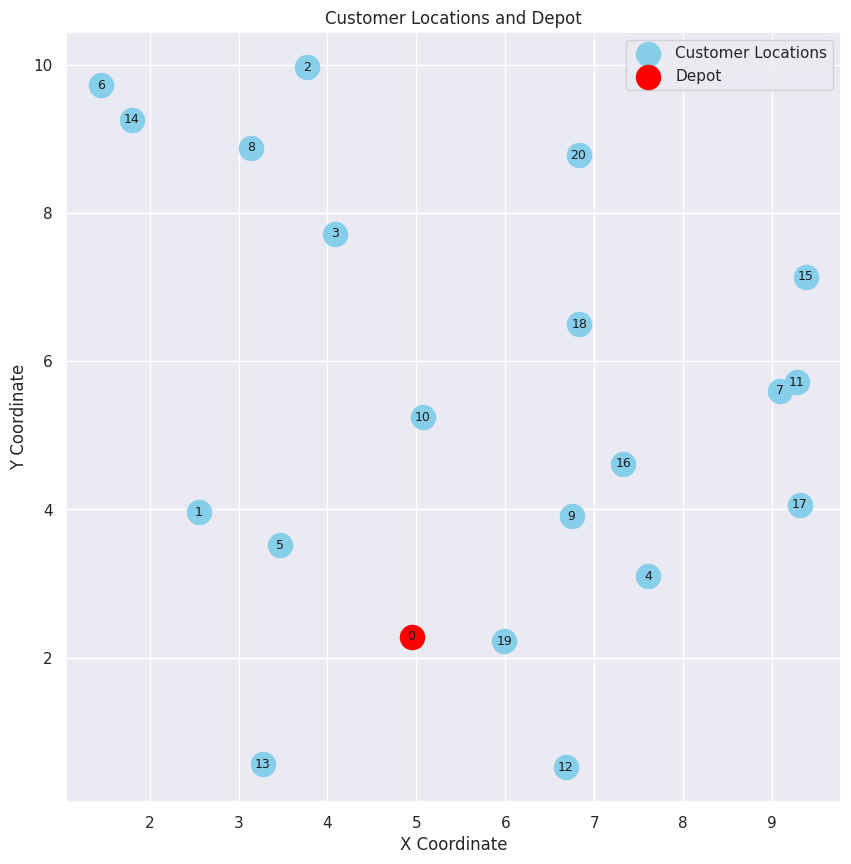

Customers: 20, Total demand: 98, Vehicle capacity: 100, Number of vehicles: 1
Customer 1: Demand = 2, Coordinates = [2.55473924 3.9632991 ]
Customer 2: Demand = 5, Coordinates = [3.77315098 9.9657423 ]
Customer 3: Demand = 6, Coordinates = [4.081972   7.71893995]
Customer 4: Demand = 8, Coordinates = [7.60536688 3.10009349]
Customer 5: Demand = 1, Coordinates = [3.46541205 3.51764817]
Customer 6: Demand = 4, Coordinates = [1.45466856 9.72664685]
Customer 7: Demand = 6, Coordinates = [9.09178438 5.59957104]
Customer 8: Demand = 7, Coordinates = [3.13590746 8.88200038]
Customer 9: Demand = 2, Coordinates = [6.74573066 3.91087448]
Customer 10: Demand = 5, Coordinates = [5.07184124 5.24103503]
Customer 11: Demand = 5, Coordinates = [9.28000928 5.71373069]
Customer 12: Demand = 5, Coordinates = [6.68337569 0.52258691]
Customer 13: Demand = 6, Coordinates = [3.27057304 0.56401639]
Customer 14: Demand = 5, Coordinates = [1.79827694 9.25933173]
Customer 15: Demand = 7, Coordinates = [9.3801522

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def VRP_instance(num_points):
    # Seed for reproducibility
    np.random.seed(50)
    coordinates = np.random.rand(num_points + 1, 2) * 10
    demand = [0] + list(np.random.randint(1, 10, size=num_points))
    demand = [int(x) for x in demand]
    vehicle_capacity = 100
    num_vehicles = sum(demand) // 100 + 1
    return num_points, coordinates, demand, vehicle_capacity, num_vehicles

# Here is a demonstration with 20 customers
num_points = 20
number_points, coordinates, demand, vehicle_capacity, num_vehicles = VRP_instance(num_points)

# Plot for customer locations and depot
plt.figure(figsize=(10, 10))
plt.scatter(coordinates[1:, 0], coordinates[1:, 1], c='skyblue', s=300, label='Customer Locations')  # Larger size for numbering
plt.scatter(coordinates[0, 0], coordinates[0, 1], c='red', s=300, label='Depot', marker='o')      # Larger size for depot

# Number the customers
for i in range(0, num_points + 1):
    plt.text(coordinates[i, 0], coordinates[i, 1], str(i), fontsize=9, ha='center', va='center', color='k')

plt.title('Customer Locations and Depot')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

print(f"Customers: {number_points}, Total demand: {sum(demand)}, Vehicle capacity: {vehicle_capacity}, Number of vehicles: {num_vehicles}")

# Print customer demands and coordinates
for i in range(1, num_points + 1):
    print(f"Customer {i}: Demand = {demand[i]}, Coordinates = {coordinates[i]}")

## CVRP Solution representation

A valid solution (Routes) to the Capacitated Vehicle Routing Problem (CVRP) with \( n \) customers and \( |K| \) vehicles is represented by a list of sublists, where each sublist denotes the route for one vehicle. Each sublist starts and ends with zero (0), indicating the depot, and includes intermediate nodes representing the sequence of customer visits.

### Solution Representation Example

Let's consider a CVRP instance with 6 customers and 3 vehicles with a capacity constraint of 11. The solution representation (Routes) will consist of a sequence of numbers from 1 to 6 (representing the customers) and zeros (0) to denote the start and end of each vehicle's route. Each vehicle's route is enclosed within a sublist starting and ending with zero (0).

An example solution sequence might look like this:

$$ [[0, 1, 2, 0], [0, 3, 4, 0], [0, 5, 6, 0]] $$

In this sequence:
- The first sublist \[ 0, 1, 2, 0 \] represents the route of the first vehicle, starting at the depot (0), visiting customer 1, then customer 2, and returning to the depot.
- The second sublist \[ 0, 3, 4, 0 \] represents the route of the second vehicle, starting at the depot (0), visiting customer 3, then customer 4, and returning to the depot.
- The third sublist \[ 0, 5, 6, 0 \] represents the route of the third vehicle, starting at the depot (0), visiting customer 5, then customer 6, and returning to the depot.

This representation allows for a clear and structured way to encode the routes for each vehicle in the Capacitated Vehicle Routing Problem (CVRP), ensuring that each vehicle's capacity constraint is respected while optimizing the total travel distance or cost.

## Cost Matrix

The euclidean distance between two customers is the cost component for the vehicle from one customer to the other. So, we need the cost matrix

### Explanation of the Code below:

The provided Python function `calculate_cost_matrix(coordinates)` computes a cost matrix based on Euclidean distances between points given their coordinates.

1. **Function Purpose:**
   - **Input:** `coordinates` is a list of tuples where each tuple represents the (x, y) coordinates of a point.
   - **Output:** Returns a square matrix (`cost_matrix`) where `cost_matrix[i][j]` represents the Euclidean distance between point `i` and point `j`.

2. **Details:**
   - It first initializes a matrix `cost_matrix` of size `num_points x num_points` filled with zeros.
   - It then computes the Euclidean distance between each pair of points using `np.linalg.norm()`, which calculates the Euclidean norm (distance) of the vector `(coordinates[i] - coordinates[j])`.
   - The resulting distance is stored in `cost_matrix[i][j]`.

3. **Example Usage:**
   - If `coordinates` is `[(0, 0), (1, 1), (2, 2)]`, the function would return a 3x3 matrix where:
     ```
     [[0.   1.41 2.83]
      [1.41 0.   1.41]
      [2.83 1.41 0.  ]]
     ```
     Here, `cost_matrix[0][1]` is approximately `1.41`, which is the Euclidean distance between points `(0, 0)` and `(1, 1)`.



In [ ]:
import numpy as np

def calculate_cost_matrix(coordinates):
    num_points = len(coordinates)
    cost_matrix = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(num_points):
            cost_matrix[i][j] = np.linalg.norm(np.array(coordinates[i]) - np.array(coordinates[j]))
    return cost_matrix

# Example usage:
coordinates = [(0, 0), (1, 1), (2, 2)]
cost_matrix = calculate_cost_matrix(coordinates)
print("Cost Matrix:")
print(cost_matrix)

Cost Matrix:
[[0.         1.41421356 2.82842712]
 [1.41421356 0.         1.41421356]
 [2.82842712 1.41421356 0.        ]]


## Cost of a solution

Given a solution (routes) for SVRP we need to calculate the total cost, that is, the sum of the euclidean distances each vehicle travels using cost_matrix.

### Explanation:

The function `evaluate_solution(routes, cost_matrix)` calculates the total cost of a given set of routes for the Capacitated Vehicle Routing Problem (CVRP). It uses a provided `cost_matrix` that contains the distances between all pairs of points (depot and customers).

1. **Function Purpose:**
   - **Input:** `routes` is a list where each sublist represents the route for one vehicle, starting and ending at the depot (0) with intermediate customer nodes. `cost_matrix` is a matrix where `cost_matrix[i][j]` represents the cost (distance or another metric) between node `i` and node `j`.
   - **Output:** Returns the total cost, which is the sum of costs for all routes combined.

2. **Details:**
   - It initializes `total_cost` to zero.
   - Iterates over each `route` in `routes`.
   - For each `route`, it calculates `route_cost` by summing up the distances between consecutive nodes (`cost_matrix[route[i-1]][route[i]]`) and adding the distance from the last node back to the depot (`cost_matrix[route[-1]][0]`).
   - Adds `route_cost` to `total_cost`.
   - Finally, returns `total_cost`, which represents the total travel cost for all vehicles in the given routes.

3. **Example Usage:**
   - `coordinates` represent the (x, y) coordinates of each point.
   - `cost_matrix` is computed using the `calculate_cost_matrix` function based on the given `coordinates`.
   - `routes` is a list of routes where each route is a list of node indices representing the sequence of visits.
   - The function `evaluate_solution` calculates and prints the total cost for the provided routes using the `cost_matrix`.

In [ ]:
def evaluate_solution(routes, cost_matrix):
    total_cost = 0

    for route in routes:
        route_cost = 0
        for i in range(len(route)):
            if i == 0:
                route_cost += cost_matrix[0][route[i]]
            else:
                route_cost += cost_matrix[route[i-1]][route[i]]
        route_cost += cost_matrix[route[-1]][0]
        total_cost += route_cost

    return total_cost

# Example usage:
coordinates = [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)]
cost_matrix = calculate_cost_matrix(coordinates)

routes = [[0, 1, 2, 0], [0, 3, 4, 0], [0, 5, 6, 0]]
print("Routes:", routes)

total_cost = evaluate_solution(routes, cost_matrix)
print("Total Cost:", total_cost)


Routes: [[0, 1, 2, 0], [0, 3, 4, 0], [0, 5, 6, 0]]
Total Cost: 33.941125496954285


## (Simple) Genetic Algorihtm implementation to solve CVRP

### Chromosome encoding

To implement GA in CVRP we need to represent solution as chromosomes (sequences). For a CVRP problem with $n$ customers we simply encode a possible solution as any permulation of $[1,2,\dots,n]$. But then it still needs to be split into routes for each vehicle by adding zeros (depot).

### Popultaion Initializaiton

In the context of implementing a simple genetic algorithm for solving the Capacitated Vehicle Routing Problem (CVRP), the initial step is to generate an initial population of solutions. This population typically consists of diverse individuals that represent potential solutions to the problem.

#### Function `initialize_population`

The function `initialize_population(population_size, num_customers)` generates an initial population of solutions for the CVRP. Here’s how it works:

1. **Inputs:**
   - `population_size`: The number of individuals (solutions) in the initial population.
   - `num_customers`: The number of customer points (excluding the depot) in the problem instance.

2. **Steps:**
   - **Choosing the Depot:**
     - The depot is chosen based on the first customer's index (`depot_index = 0`). This assumption simplifies the example by using the first customer as the depot.

   - **Random Individuals:**
     - The rest of the population (`population_size - 2` individuals) is filled with randomly shuffled sequences of customer indices (`1` to `num_customers`), excluding the depot.

3. **Output:**
   - `population`: A list containing `population_size` individuals, each represented as a list of customer indices.


In [ ]:
import random
# Initialize population including clustered and clockwise individuals
def initialize_population(population_size, num_customers):
    population = []
    depot_index = 0  # Choosing the first customer as the depot
    center = coordinates[depot_index]
    # Fill the rest of the population with random individuals
    while len(population) < population_size:
        individual = list(range(1, num_customers + 1))  # Start numbering from 1
        random.shuffle(individual)
        population.append(individual)

    return population

# Initialize population including clustered and clockwise individuals
num_points = 20
population_size = 10
population = initialize_population(population_size, num_points - 1)

# Print the initial population for verification
print("Initial Population:")
for ind in population:
    print(ind)

Initial Population:
[5, 10, 12, 13, 8, 1, 19, 2, 6, 15, 18, 14, 9, 7, 11, 4, 17, 3, 16]
[5, 16, 13, 3, 11, 12, 7, 10, 15, 19, 6, 9, 8, 4, 14, 1, 2, 18, 17]
[2, 7, 16, 3, 19, 4, 15, 17, 5, 10, 18, 12, 6, 13, 9, 14, 1, 11, 8]
[2, 7, 4, 17, 1, 3, 11, 12, 16, 13, 6, 5, 10, 19, 9, 15, 8, 14, 18]
[6, 9, 4, 18, 17, 5, 15, 16, 3, 13, 2, 19, 12, 8, 11, 10, 7, 14, 1]
[18, 3, 13, 15, 19, 4, 8, 5, 17, 16, 6, 1, 10, 7, 14, 12, 9, 11, 2]
[14, 16, 7, 1, 8, 9, 10, 5, 6, 17, 18, 19, 15, 13, 11, 4, 3, 12, 2]
[2, 15, 6, 11, 19, 14, 13, 17, 8, 1, 4, 7, 9, 16, 12, 10, 3, 5, 18]
[17, 8, 15, 16, 3, 6, 7, 19, 1, 9, 4, 5, 14, 10, 13, 12, 2, 18, 11]
[10, 1, 13, 9, 3, 18, 12, 17, 2, 4, 15, 7, 8, 16, 6, 14, 11, 19, 5]


### Splitting chromose encoding into CVRP routes

In this simple Genetic Algorithm (GA) implementation for solving the Capacitated Vehicle Routing Problem (CVRP), a greedy approach is used to split a given chromosome (individual) into vehicle routes based on customer demand and vehicle capacity constraints.

**The idea is to iteratively construct feasible routes for each vehicle starting from an initial depot (node 0) and adding customers in a way that minimizes the total number of vehicles required while ensuring that the cumulative demand of customers in each route does not exceed the vehicle’s capacity.**

#### Function `split_into_routes`

The function `split_into_routes(individual, demand, vehicle_capacity)` takes an individual chromosome (solution representation), customer demand information, and a vehicle capacity constraint as inputs, and splits the chromosome into feasible vehicle routes.

1. **Inputs:**
   - `individual`: A list representing the chromosome or solution, typically a sequence of customer indices.
   - `demand`: A list or dictionary where `demand[customer]` gives the demand of each customer.
   - `vehicle_capacity`: The maximum capacity that each vehicle can carry.

2. **Process:**
   - **Initialization:**
     - `routes`: List to store the routes for each vehicle.
     - `route`: List to accumulate customers for the current route, starting with the depot (0).
     - `load`: Variable to keep track of the total load (demand) of the current route.

   - **Splitting Process:**
     - Iterates through each customer in `individual`.
     - Checks if adding the current customer to the current route exceeds `vehicle_capacity`.
     - If adding the customer exceeds the capacity:
       - Completes the current route by appending the depot (0) and adds it to `routes`.
       - Starts a new route with the depot (0) and the current customer.
       - Resets `load` to the demand of the current customer.
     - If adding the customer does not exceed the capacity:
       - Adds the customer to the current route.
       - Updates `load` by adding the demand of the current customer.

   - **Finalization:**
     - After iterating through all customers, appends the last route (which might not have exceeded capacity) to `routes` and adds the depot (0) at the end.

3. **Output:**
   - `routes`: A list of lists where each sublist represents a route for one vehicle, starting and ending at the depot (0) with intermediate customer nodes.

In [ ]:
def split_into_routes(individual, demand, vehicle_capacity):
    routes = []
    route = [0]
    load = 0
    for customer in individual:
        if load + demand[customer] > vehicle_capacity:
            routes.append(route + [0])
            route = [0, customer]
            load = demand[customer]
        else:
            route.append(customer)
            load += demand[customer]
    routes.append(route + [0])
    return routes

# Example data with 10 customers
individual = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
demand = [0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 1]
vehicle_capacity = 20

# Calculate routes using the split_into_routes function
routes = split_into_routes(individual, demand, vehicle_capacity)
print("Routes:", routes)

Routes: [[0, 1, 2, 3, 4, 5, 6, 0], [0, 7, 8, 9, 10, 0]]


### Alternating Edges Crossover (AEX)

In this study, we adopt the Alternating Edges Crossover (AEX) operator, which has shown superior performance compared to other crossover methods: https://www.researchgate.net/publication/268043232_Comparison_of_eight_evolutionary_crossover_operators_for_the_vehicle_routing_problem.

AEX interprets a chromosome as a directed cycle of arcs and aims to create a child chromosome by alternately selecting arcs from each parent, with additional random selections to maintain feasibility.

#### Example Illustration:

Consider two parent chromosomes:
- Parent 1: $(2 7 4 9 1 5 3 6 8)$
- Parent 2: $(1 9 6 8 3 2 4 7 5)$

1. **Initialization:** Start with the first arc from Parent 1: 2 → 7.
   - Child chromosome: $ c = (2 7 * * * * * * *) $

2. **Select from Parent 2:** Choose the arc following vertex 7, which is 7 → 5.
   - Child chromosome: $ c = (2 7 5 * * * * * *) $

3. **Continue alternating:** Select the next arc from Parent 1 following vertex 5, which is 5 → 3.
   - Child chromosome: $ c = (2 7 5 3 * * * * *) $

4. **Handle infeasibility:** To prevent premature completion of the cycle (e.g., selecting 8 → 3 from Parent 2), randomly choose from remaining unvisited vertices (1, 4, 6, 8, 9). Suppose we choose vertex 4:
   - Child chromosome: $ c = (2 7 5 3 4 * * * *) $

5. **Resume alternating:** Select the next arcs as 4 → 9 from Parent 1, 9 → 6 from Parent 2, and 6 → 8 from Parent 1.
   - Child chromosome: $ c = (2 7 5 3 4 9 6 8 *) $

6. **Handle infeasibility again:** Randomly choose from remaining vertices (1).
   - Child chromosome: $ c = (2 7 5 3 4 9 6 8 1) $

This process ensures that the child chromosome inherits characteristics from both parents while maintaining feasibility through random selections when necessary. AEX is effective in balancing exploration (through alternating selections) and exploitation (through direct inheritance), contributing to its efficacy in solving combinatorial optimization problems like the Capacitated Vehicle Routing Problem (CVRP).

In [ ]:
def aex_crossover(parent1, parent2):
    num_customers = len(parent1)
    child = [-1] * num_customers  # Initialize child chromosome with placeholders
    child[0] = parent1[0]  # Start with the first node from parent 1
    used = {child[0]}  # Track used nodes

    current = child[0]  # Start with the first node as current node
    parent1_dict = {parent1[i]: parent1[(i + 1) % num_customers] for i in range(num_customers)}  # Create dictionary for parent 1
    parent2_dict = {parent2[i]: parent2[(i + 1) % num_customers] for i in range(num_customers)}  # Create dictionary for parent 2

    for i in range(1, num_customers):
        if i % 2 == 0:
            next_node = parent2_dict[current]  # Alternate selection: Even index picks from parent 2
        else:
            next_node = parent1_dict[current]  # Alternate selection: Odd index picks from parent 1

        if next_node in used:
            remaining_nodes = [node for node in range(1, num_customers + 1) if node not in used]  # Find unused nodes
            next_node = random.choice(remaining_nodes)  # Randomly select from unused nodes if already used

        child[i] = next_node  # Assign next node to child chromosome
        used.add(next_node)  # Mark node as used
        current = next_node  # Update current node

    return child

# Example usage:
parent1 = [int(char) for char in '274915368']
parent2 = [int(char) for char in '196832475']
child = aex_crossover(parent1, parent2)
print("Parent 1:", parent1)
print("Parent 2:", parent2)
print("Child:", child)

Parent 1: [2, 7, 4, 9, 1, 5, 3, 6, 8]
Parent 2: [1, 9, 6, 8, 3, 2, 4, 7, 5]
Child: [2, 7, 5, 3, 8, 4, 6, 9, 1]


### Fintess function

We now define the fitness function for our Genetic Algorithm (GA) implementation, which is the inverse of the total cost incurred for a given solution to the Capacitated Vehicle Routing Problem (CVRP). The fitness function evaluates how well an individual (chromosome) performs by calculating the total transportation cost based on the routes generated. Lower costs correspond to higher fitness values, indicating more efficient solutions that minimize transportation distances and adhere to vehicle capacity constraints. By optimizing for higher fitness values through GA operations like crossover and mutation, we aim to evolve solutions that effectively route deliveries while minimizing operational costs in real-world logistics scenarios.

In [ ]:
def evaluate_fitness(individual, cost_matrix, demand, vehicle_capacity):
    # Step 1: Split the individual into feasible routes based on capacity constraints
    routes = split_into_routes(individual, demand, vehicle_capacity)

    # Step 2: Calculate the total cost of the solution using the given cost matrix
    total_cost = evaluate_solution(routes, cost_matrix)

    # Step 3: Return the fitness value, which is the inverse of the total cost
    return 1/total_cost

# Example usage:
num_points = 50
num_customers, coordinates, demand, vehicle_capacity, num_vehicles = VRP_instance(num_points)
cost_matrix = calculate_cost_matrix(coordinates)
population_size = 1
individual = initialize_population(population_size, num_customers)[0]

fitness = evaluate_fitness(individual, cost_matrix, demand, vehicle_capacity)
print("Fitness:", fitness)

Fitness: 0.0033554376744949557


### Mutation

#### How Mutation Works

In the context of the CVRP, mutation typically involves making small changes to an individual's sequence of customer visits. A common mutation strategy is to swap the positions of two randomly chosen customers. This simple alteration can create a new route, potentially offering a more efficient solution.

#### Example Mutation Function

The following `mutation` function takes an individual (chromosome) and a mutation rate as input, and performs mutation by swapping pairs of customers in the sequence:

```python
def mutation(individual, mutation_rate):
    # Perform mutation_rate * len(individual) swaps in the individual
    for _ in range(int(mutation_rate * len(individual))):
        # Randomly select two positions to swap
        i, j = random.sample(range(len(individual)), 2)
        # Swap the values at these positions
        individual[i], individual[j] = individual[j], individual[i]
    return individual
```

#### Explanation:

1. **Mutation Rate**:
   - The `mutation_rate` determines the fraction of the individual's length that will be subject to mutation. For example, if `mutation_rate` is 0.1 and the individual's length is 10, one position swap will occur.

2. **Random Swapping**:
   - The function uses `random.sample` to select two unique indices within the individual's sequence.
   - The values at these indices are then swapped to introduce variation.

3. **Return Mutated Individual**:
   - The function returns the mutated individual, which now has a slightly altered sequence of customer visits.

In [ ]:
def mutation(individual, mutation_rate):
    for _ in range(int(mutation_rate * len(individual))):
        i, j = random.sample(range(len(individual)), 2)
        individual[i], individual[j] = individual[j], individual[i]
    return individual

import random

# Example individual representing a sequence of customer visits
individual = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Define a mutation rate
mutation_rate = 0.2  # 20% mutation rate

# Print the original individual
print("Original individual:", individual)

# Apply mutation
mutated_individual = mutation(individual, mutation_rate)

# Print the mutated individual
print("Mutated individual:", mutated_individual)

Original individual: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Mutated individual: [1, 2, 3, 4, 5, 7, 6, 8, 10, 9]


### Plotting the routes (Optional)

In this example, we use the networkx library to visualize the vehicle routes for the Capacitated Vehicle Routing Problem (CVRP). NetworkX provides powerful tools for creating, manipulating, and studying the structure and dynamics of complex networks.

To make better visualisation, we remove the numbering of the customers.

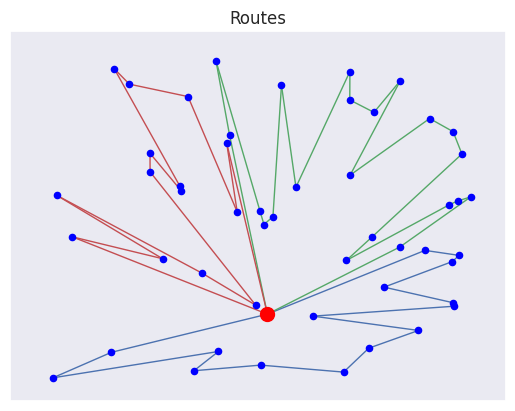

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def plot_routes(individual, coordinates, demand, vehicle_capacity, title='Routes'):
    routes = split_into_routes(individual, demand, vehicle_capacity)
    G = nx.Graph()

    for i, coord in enumerate(coordinates):
        G.add_node(i, pos=coord)

    pos = nx.get_node_attributes(G, 'pos')

    for route in routes:
        edges = [(route[i], route[i + 1]) for i in range(len(route) - 1)]
        G.add_edges_from(edges)

    # Draw all nodes except the 0th node
    non_zero_nodes = [node for node in G.nodes if node != 0]
    nx.draw_networkx_nodes(G, pos, nodelist=non_zero_nodes, node_size=20, node_color='blue')

    # Draw the 0th node with O shape
    nx.draw_networkx_nodes(G, pos, nodelist=[0], node_size=100, node_color='red', node_shape='o')

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i, route in enumerate(routes):
        edges = [(route[i], route[i + 1]) for i in range(len(route) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors[i % len(colors)])

    plt.title(title)
    plt.grid(False)
    plt.show()

# Here is a demonstration with 50 customers
num_points = 50
num_customers, coordinates, demand, vehicle_capacity, num_vehicles = VRP_instance(num_points)
cost_matrix = calculate_cost_matrix(coordinates)
individual = [30, 39, 41, 13, 29, 12, 23, 27, 19, 34, 49, 4, 24, 17, 38, 21, 32, 11, 7, 9, 16, 15, 22, 42, 18, 37, 43, 20, 35, 45, 33, 10, 48, 31, 2, 3, 44, 47, 8, 14, 6, 25, 46, 36, 28, 26, 5, 40, 1, 50]

# Plot the original routes
plot_routes(individual, coordinates, demand, vehicle_capacity)

### Fitness Progress Plotting and Genetic Algorithm Execution

- To visualize the progress of the genetic algorithm (GA), we define a function `plot_fitness_progress` that plots the best fitness values over generations. This helps in understanding how the algorithm evolves and improves the solutions over time.

- Next, we define the main GA function `run_ga` which orchestrates the entire process of evolving solutions for the Capacitated Vehicle Routing Problem (CVRP). The function initializes the population, evaluates fitness, applies crossover and mutation, and maintains the best solutions found across generations.


- Finally, we run the GA with the given problem instance and parameters, then visualize the best routes and fitness progress

Generation 0: Best Fitness = 0.008088318331993251


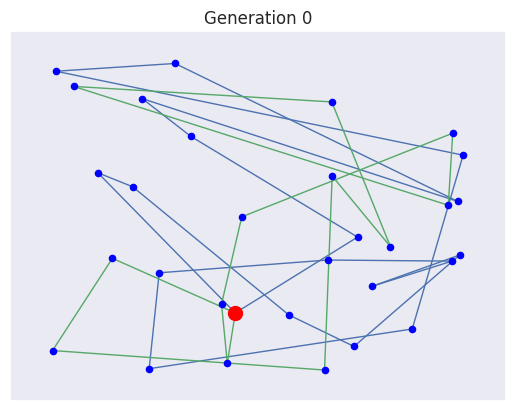

Generation 500: Best Fitness = 0.0115133774446844


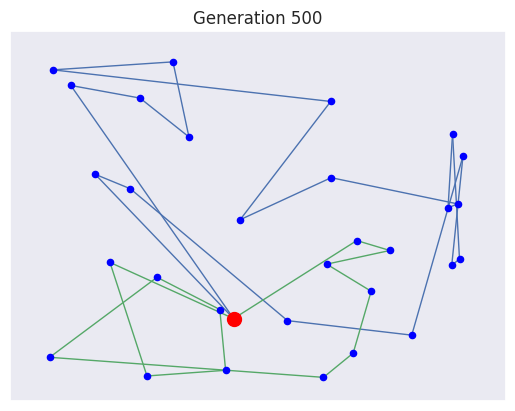

Generation 1000: Best Fitness = 0.0115133774446844


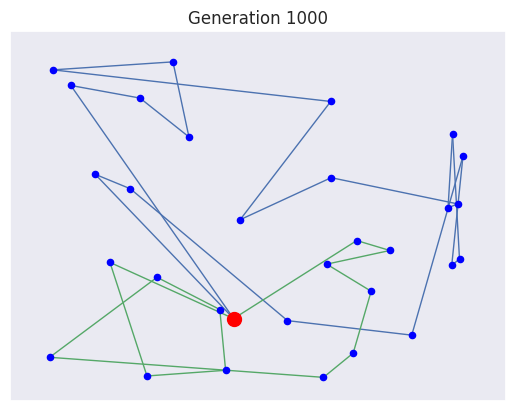

Generation 1500: Best Fitness = 0.0115133774446844


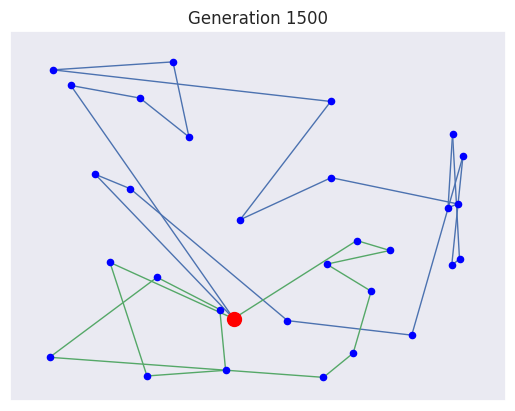

Generation 2000: Best Fitness = 0.0115133774446844


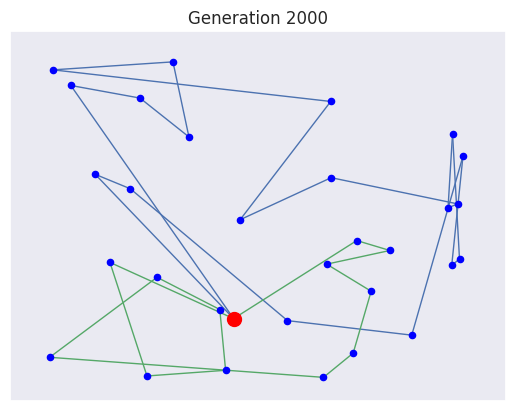

Generation 2500: Best Fitness = 0.011846541730312096


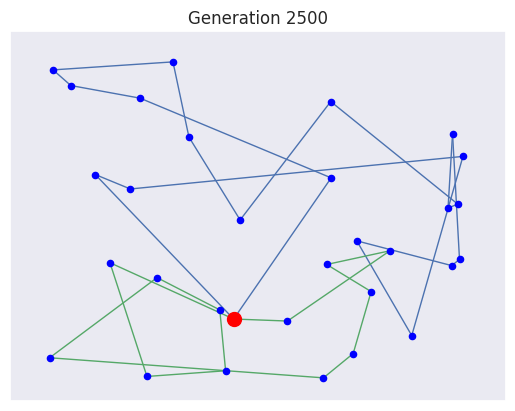

Generation 3000: Best Fitness = 0.011846541730312096


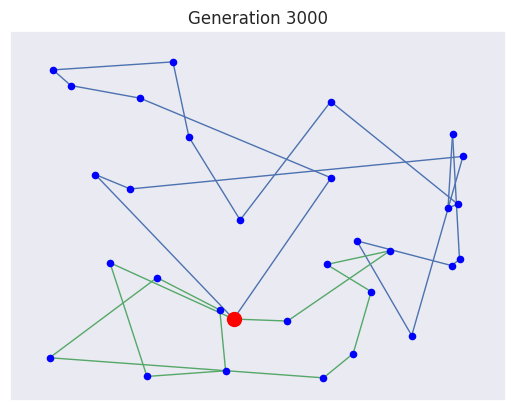

Generation 3500: Best Fitness = 0.012174156584917509


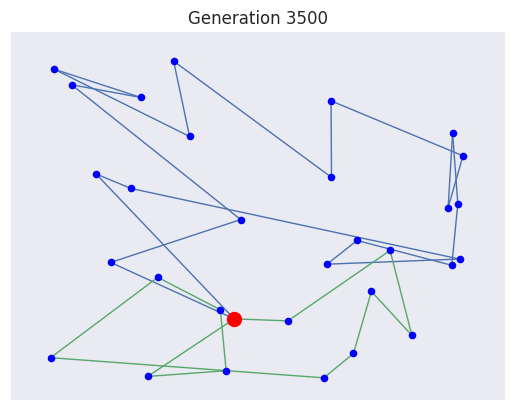

Generation 4000: Best Fitness = 0.012174156584917509


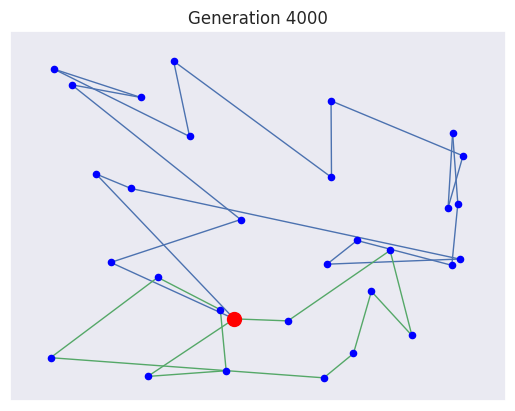

Generation 4500: Best Fitness = 0.012174156584917509


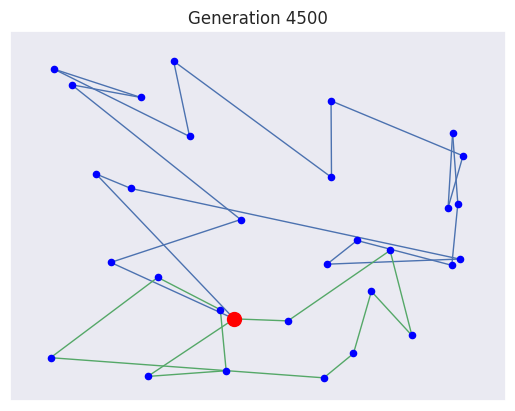

Generation 5000: Best Fitness = 0.012174156584917509


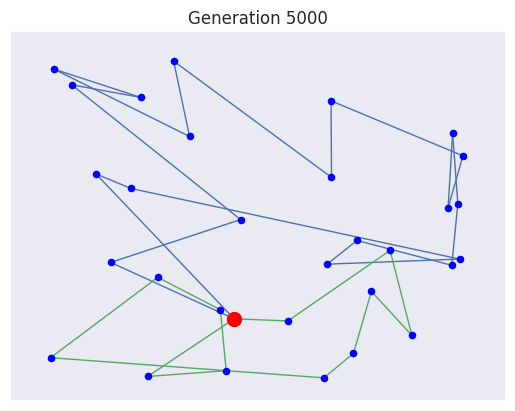

Generation 5500: Best Fitness = 0.012946983785363918


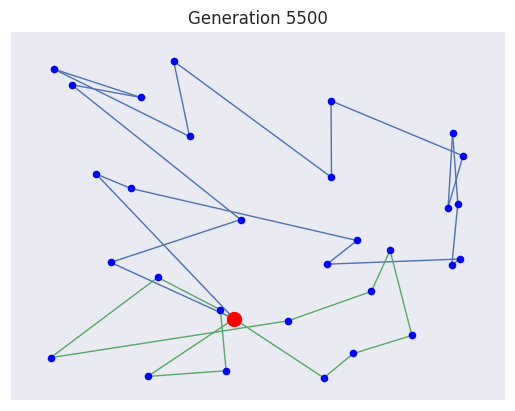

Generation 6000: Best Fitness = 0.012946983785363918


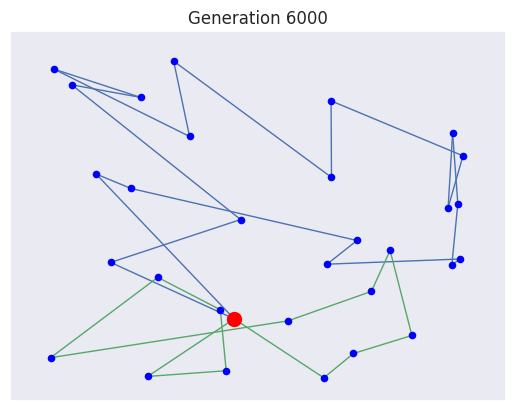

Generation 6500: Best Fitness = 0.013042689243004084


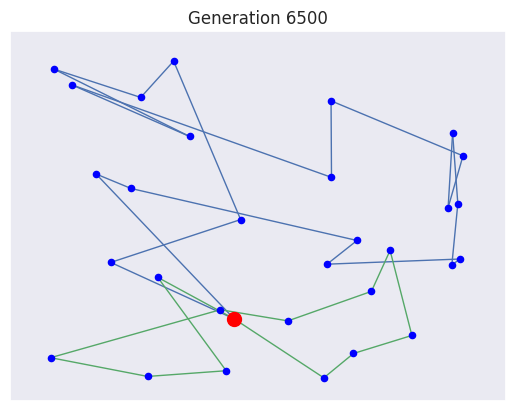

Generation 7000: Best Fitness = 0.013042689243004084


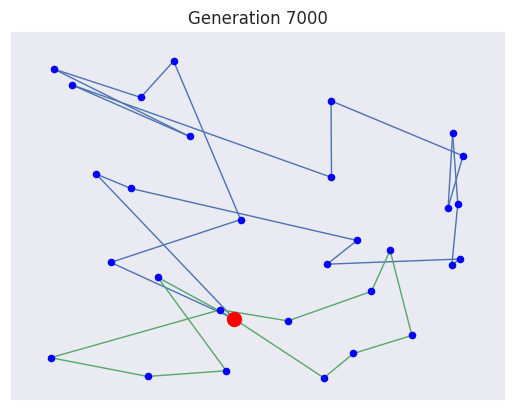

Generation 7500: Best Fitness = 0.013042689243004084


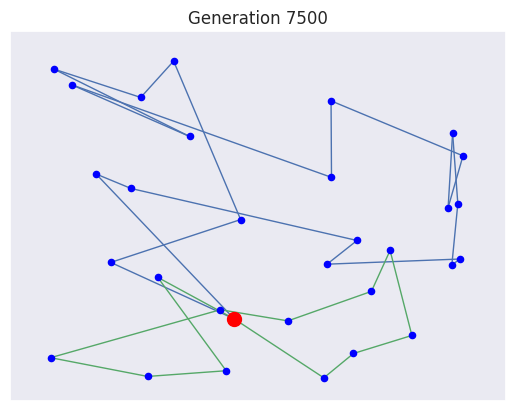

Generation 8000: Best Fitness = 0.013042689243004084


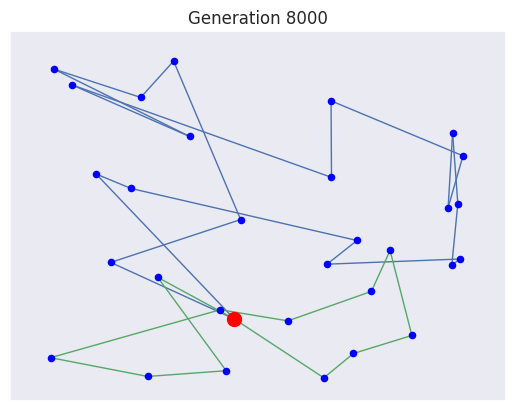

Generation 8500: Best Fitness = 0.01332296632153607


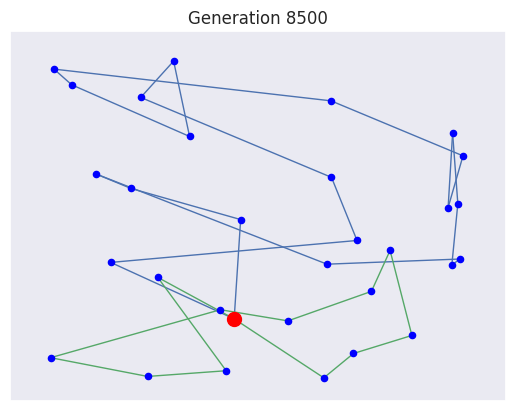

Generation 9000: Best Fitness = 0.01332296632153607


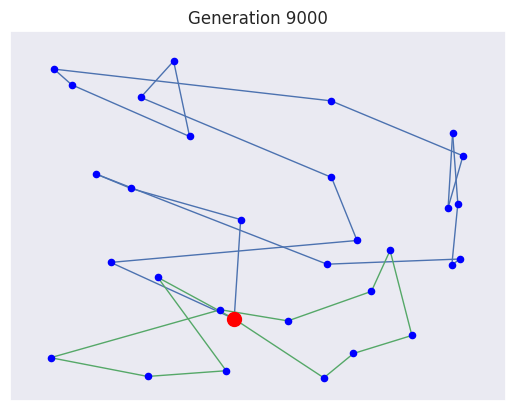

Generation 9500: Best Fitness = 0.01332296632153607


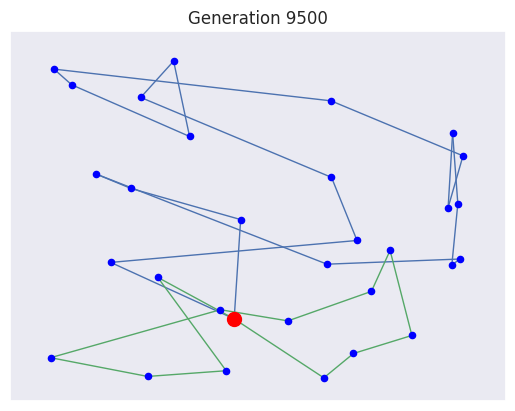

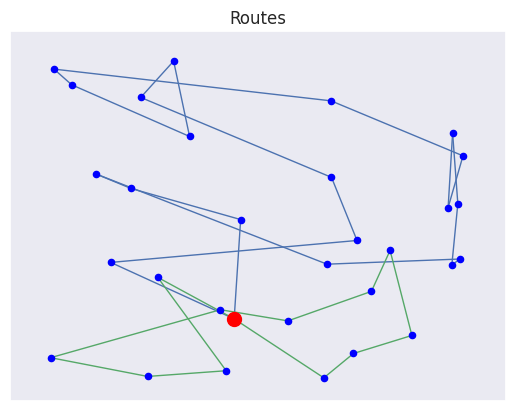

Best Routes: [[0, 10, 25, 28, 9, 17, 24, 11, 22, 7, 15, 20, 6, 14, 3, 2, 8, 18, 16, 1, 0], [0, 5, 29, 13, 30, 26, 19, 4, 21, 27, 23, 12, 0]]
Best Cost: 75.05835981762844


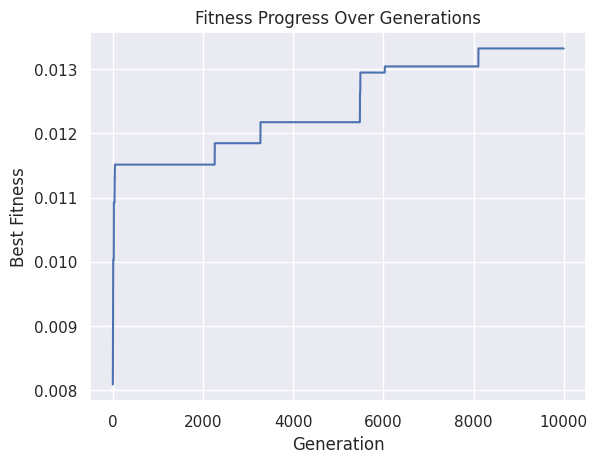

In [ ]:

def plot_fitness_progress(best_fitness_progress):
    plt.plot(best_fitness_progress)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Fitness Progress Over Generations')
    plt.grid(True)
    plt.show()

def run_ga(coordinates, demand, vehicle_capacity, num_vehicles, population_size, num_generations, crossover_rate, mutation_rate):
    num_customers = len(demand) - 1
    cost_matrix = calculate_cost_matrix(coordinates)
    population = initialize_population(population_size, num_customers)
    mutation_rate = mutation_rate

    best_fitness_progress = []
    best_individual = None
    best_fitness = float('-inf')

    for generation in range(num_generations):
        fitnesses = [evaluate_fitness(ind, cost_matrix, demand, vehicle_capacity) for ind in population]
        new_population = []

        # Elitism: Copy the best 4 solutions to the next generation
        num_elite = 4
        elite_indices = np.argsort(fitnesses)[-num_elite:]
        elite_individuals = [population[i] for i in elite_indices]
        new_population.extend(elite_individuals)

        # Select the top 50 parents based on fitness
        top_50_indices = np.argsort(fitnesses)[-25:]
        top_50_parents = [population[i] for i in top_50_indices]

        # Create 90% of the new population from the top 50 parents using AEX crossover
        num_children = population_size - num_elite
        for _ in range(num_children // 2):
            parent1 = random.choice(top_50_parents)
            parent2 = random.choice(top_50_parents)
            offspring1 = aex_crossover(parent1, parent2)
            offspring2 = aex_crossover(parent2, parent1)
            new_population.extend([offspring1, offspring2])

        # Apply mutation to 20% of the children
        num_mutations = int(0.2 * num_children)
        children_indices = random.sample(range(num_elite, population_size), num_mutations)
        for index in children_indices:
            new_population[index] = mutation(new_population[index], mutation_rate)

        population = new_population
        fitnesses = [evaluate_fitness(ind, cost_matrix, demand, vehicle_capacity) for ind in population]

        best_generation_individual = population[np.argmax(fitnesses)]
        best_generation_fitness = max(fitnesses)
        if best_generation_fitness > best_fitness:
            best_individual = best_generation_individual
            best_fitness = best_generation_fitness

        best_fitness_progress.append(best_fitness)

        if generation % 500 == 0:
            print(f'Generation {generation}: Best Fitness = {best_fitness}')
            plot_routes(best_individual, coordinates, demand, vehicle_capacity, f'Generation {generation}')

    best_routes = split_into_routes(best_individual, demand, vehicle_capacity)
    return best_routes, 1 / best_fitness, best_individual, best_fitness_progress

# Generate random points for the depot and customers
num_customers = 30
num_customers, coordinates, demand, vehicle_capacity, num_vehicles = VRP_instance(num_customers)
cost_matrix = calculate_cost_matrix(coordinates)

# Genetic algorithm parameters
population_size = 50
num_generations = 10000
mutation_rate = 0.2
crossover_rate=0.8

# Execute the GA:
best_routes, best_cost, best_individual, best_fitness_progress = run_ga(coordinates, demand, vehicle_capacity, num_vehicles, population_size, num_generations, crossover_rate, mutation_rate)

plot_routes(best_individual, coordinates, demand, vehicle_capacity)
print('Best Routes:', best_routes)
print('Best Cost:', best_cost)

plot_fitness_progress(best_fitness_progress)

# More advanced GA Techniques for Solving CVRP

In what follows we provide three types of improvement of the GA above:

- Partial Randomness in Population Initialization

- Improved Route Splitting Approaches

- Adaptive Mutation

## Partial Randomness in Population Initialization

In GA, when initializating the zero generation, we include two non-random individuals (chromosomes):

- A Clockwise ordered individual

- A Clustered individual

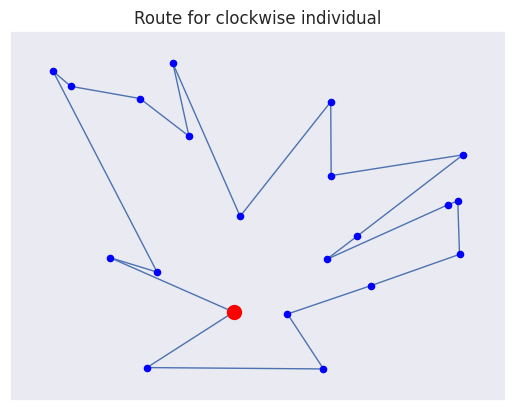

In [ ]:
# A Clockwise ordered individual
# Function to calculate polar angle relative to a given center
def polar_angle(point, center):
    return np.arctan2(point[1] - center[1], point[0] - center[0])

# Function to get clockwise ordered individual based on polar angle
def get_clockwise_individual(coordinates, center):
    polar_angles = {i+1: polar_angle(coord, center) for i, coord in enumerate(coordinates)}  # Start numbering from 1
    sorted_indices = sorted(polar_angles, key=polar_angles.get)
    return sorted_indices

# Here is a demonstration with 20 customers
num_points = 20
number_points, coordinates, demand, vehicle_capacity, num_vehicles = VRP_instance(num_points)
depot_index = 0  # Choosing the first customer as the depot
center = coordinates[depot_index]

clockwise_individual = get_clockwise_individual(coordinates[1:], center)

# # Plotting the result for the clockwise individual
plot_routes(clockwise_individual, coordinates, demand, vehicle_capacity, title = "Route for clockwise individual")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


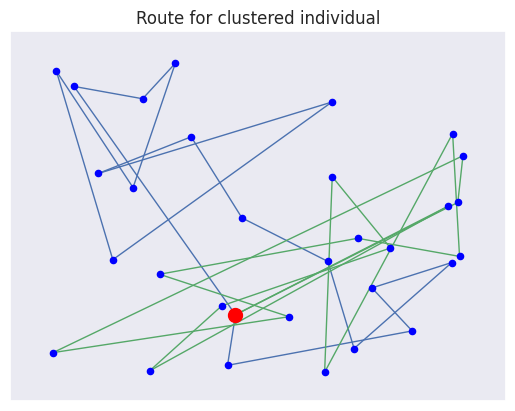

In [ ]:
# Clustered individual

import numpy as np
from sklearn.cluster import KMeans

# Function to get clustered individual
def get_clustered_individual(coordinates, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    clusters = kmeans.fit_predict(coordinates)
    clustered_individual = []
    for cluster_id in range(num_clusters):
        points_in_cluster = np.where(clusters == cluster_id)[0] + 1  # Start numbering from 1
        random.shuffle(points_in_cluster)  # Shuffle points in each cluster
        clustered_individual.extend(points_in_cluster)

    return clustered_individual

# Here is a demonstration with 30 customers
num_points = 30
number_points, coordinates, demand, vehicle_capacity, num_vehicles = VRP_instance(num_points)

clustered_individual = get_clustered_individual(coordinates[1:], num_clusters=num_vehicles)

# Plot the clustered individual
plot_routes(clustered_individual, coordinates, demand, vehicle_capacity, title = "Route for clustered individual")

In [ ]:
# Initialize population including clustered and clockwise individuals
def initialize_population(population_size, num_customers):
    population = []
    depot_index = 0  # Choosing the first customer as the depot
    center = coordinates[depot_index]

    # Generate clustered individual (number of clusters = number of vehicles)
    clustered_individual = get_clustered_individual(coordinates[1:], num_clusters=num_vehicles)

    # Add clustered individual to the population
    population.append(clustered_individual[:])
    # Generate clockwise ordered individual
    clockwise_individual = get_clockwise_individual(coordinates[1:], center)

    # Add clockwise individual to the population
    population.append(clockwise_individual[:])

    # Fill the rest of the population with random individuals
    while len(population) < population_size:
        individual = list(range(1, num_customers + 1))  # Start numbering from 1
        random.shuffle(individual)
        population.append(individual)

    return population


# Initialize population including clustered and clockwise individuals
population_size = 10
num_points = 20
number_points, coordinates, demand, vehicle_capacity, num_vehicles = VRP_instance(num_points)
population = initialize_population(population_size, num_points)


# Print the initial population for verification
print("Initial Population:")
for ind in population:
    print(ind)

Initial Population:
[17, 4, 9, 12, 18, 5, 14, 3, 19, 10, 15, 13, 8, 7, 20, 16, 1, 2, 6, 11]
[13, 12, 19, 4, 17, 11, 7, 9, 16, 15, 18, 20, 10, 2, 3, 8, 14, 6, 5, 1]
[5, 2, 14, 8, 13, 15, 6, 17, 9, 1, 3, 10, 12, 4, 11, 16, 20, 19, 7, 18]
[7, 5, 11, 18, 13, 4, 1, 6, 3, 16, 19, 15, 10, 20, 9, 2, 12, 14, 8, 17]
[2, 17, 4, 11, 10, 5, 7, 6, 9, 1, 12, 18, 3, 13, 20, 8, 15, 19, 14, 16]
[19, 6, 4, 18, 12, 8, 3, 14, 13, 11, 2, 1, 7, 15, 10, 5, 16, 9, 20, 17]
[16, 1, 20, 3, 6, 5, 19, 4, 7, 13, 17, 2, 9, 18, 15, 14, 12, 11, 8, 10]
[1, 20, 19, 4, 2, 13, 7, 6, 14, 8, 16, 18, 10, 9, 3, 11, 17, 5, 12, 15]
[1, 5, 9, 16, 7, 10, 18, 2, 20, 14, 12, 15, 19, 8, 17, 11, 3, 13, 4, 6]
[16, 13, 6, 14, 5, 9, 20, 4, 15, 18, 17, 7, 19, 1, 11, 8, 12, 10, 2, 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Route Splitting Approaches (Solution encoding)

- Greedy approach

- Dynamic Programming approach

- Heuristic approach

In [ ]:
num_points, coordinates, demand, vehicle_capacity, num_vehicles = VRP_instance(30)
cost_matrix = calculate_cost_matrix(coordinates)
individual = list(range(1, num_points))
random.shuffle(individual)
print("Individual:", individual)

Individual: [10, 25, 14, 20, 7, 11, 4, 2, 29, 26, 19, 1, 18, 22, 21, 23, 8, 13, 3, 16, 12, 24, 5, 27, 28, 17, 15, 9, 6]


### Greedy Approach for Route Splitting

In this section, we use a greedy approach to split the given chromosome (individual) into vehicle routes. This method is straightforward and efficient, ensuring that each vehicle route does not exceed the given capacity constraints. The greedy approach is already used in the simple Genetic Algorithm (GA) implementation above. We also use the `time` library to measure the execution time and compare it with other methods.

### Explanation of the code below

1. **Initialization**:
   - The `split_into_routes` function begins by initializing an empty list of routes, starting the first route at the depot (node 0), and setting the initial load to 0.

2. **Route Construction**:
   - The function iterates over each customer in the given chromosome (individual).
   - If adding the current customer exceeds the vehicle's capacity, the current route is closed by appending the depot at the end, and a new route is started with the current customer.
   - If adding the current customer does not exceed the capacity, the customer is simply added to the current route, and the load is updated.

3. **Final Route**:
   - After processing all customers, the last route is appended to the list of routes.

4. **Example Usage**:
   - The provided example demonstrates how to use the `split_into_routes` function with predefined `individual`, `demand`, and `vehicle_capacity` variables.
   - It prints the generated routes and evaluates the total cost using the `evaluate_solution` function.

5. **Execution Time**:
   - The start and end times of the function execution are recorded to measure the elapsed time. This helps in comparing the efficiency of different route splitting methods.

The greedy approach is simple and efficient for splitting routes based on capacity constraints. It is particularly useful when quick solutions are needed, though it may not always provide the optimal solution compared to more sophisticated methods like dynamic programming or genetic algorithms.

In [ ]:
#Greedy approach already used in the simple GA implementation above
# We also use time library to test which apporach is faster
import time

start_time = time.time()

def split_into_routes(individual, demand, vehicle_capacity):
    routes = []
    route = [0]
    load = 0
    for customer in individual:
        if load + demand[customer] > vehicle_capacity:
            routes.append(route + [0])
            route = [0, customer]
            load = demand[customer]
        else:
            route.append(customer)
            load += demand[customer]
    routes.append(route + [0])
    return routes

# Example usage
# Calculate routes using the split_into_routes function
routes = split_into_routes(individual, demand, vehicle_capacity)
print("Routes:", routes)
total_cost = evaluate_solution(routes, cost_matrix)
print("Total Cost:", total_cost)
# Your code here

end_time = time.time()

elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Routes: [[0, 10, 25, 14, 20, 7, 11, 4, 2, 29, 26, 19, 1, 18, 22, 21, 0], [0, 23, 8, 13, 3, 16, 12, 24, 5, 27, 28, 17, 15, 9, 6, 0]]
Total Cost: 149.10399043986365
Elapsed time: 0.0007236003875732422 seconds


### Dynamic Programming Approach for Route Splitting

The dynamic programming (DP) approach provides an efficient way to split a given chromosome (individual) into vehicle routes while minimizing the total cost and adhering to the vehicle capacity constraints. This method ensures that we find the optimal routes by exploring all possible splits of the sequence. Below is the explanation of the provided DP code.


### Explanation of code below

1. **Initialization**:
   - We initialize a list `dp` with size `n+1` (where `n` is the number of customers) to store the minimum cost to service the first `i` customers. Initially, all values are set to infinity (`float('inf')`), except `dp[0]` which is set to 0 since servicing zero customers has no cost.
   - We also initialize a list `split_point` to keep track of the optimal split points.

2. **DP Table Calculation**:
   - We iterate through each possible end point `i` of the routes.
   - For each `i`, we iterate backwards from `i` to find all possible start points `j` for the route ending at `i`.
   - We accumulate the load of the route and check if it exceeds the vehicle capacity. If it does, we break out of the inner loop.
   - We calculate the cost of servicing the route from `j` to `i` and update the `dp` table and `split_point` if a lower cost is found.

3. **Backtracking**:
   - After filling the `dp` table, we backtrack using the `split_point` list to construct the routes.
   - Starting from `n`, we trace back to find the start points of each route and add the routes to the `routes` list.

4. **Execution Time**:
   - We record the start and end time of the function execution to measure the elapsed time.

This DP approach ensures that we get the optimal routes for the given individual, minimizing the total cost while respecting the vehicle capacity constraints.

In [ ]:
# Import necessary library for timing the execution
import time

# Record the start time
start_time = time.time()

def split_into_routes_dp(individual, cost_matrix, demand, vehicle_capacity):
    n = len(individual)
    dp = [float('inf')] * (n + 1)
    dp[0] = 0
    split_point = [-1] * (n + 1)

    # Dynamic Programming to find minimum cost splits
    for i in range(1, n + 1):
        load = 0
        for j in range(i, 0, -1):
            load += demand[individual[j-1]]
            if load > vehicle_capacity:
                break
            cost = (dp[j-1] + cost_matrix[0][individual[j-1]] +
                    sum(cost_matrix[individual[k]][individual[k+1]] for k in range(j-1, i-1)) +
                    cost_matrix[individual[i-1]][0])
            if cost < dp[i]:
                dp[i] = cost
                split_point[i] = j-1

    # Backtrack to get the routes
    routes = []
    i = n
    while i > 0:
        j = split_point[i]
        routes.append([0] + individual[j:i] + [0])
        i = j

    routes.reverse()
    return routes, dp[n]

# Calculate routes using the dynamic programming approach
routes, total_cost = split_into_routes_dp(individual, cost_matrix, demand, vehicle_capacity)

print("Routes:", routes)
print("Total Cost:", total_cost)

# Record the end time and calculate the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Routes: [[0, 10, 25, 14, 20, 7, 11, 4, 2, 29, 26, 0], [0, 19, 1, 18, 22, 21, 23, 8, 13, 3, 16, 12, 24, 5, 27, 28, 17, 15, 9, 6, 0]]
Total Cost: 146.15436023859124
Elapsed time: 0.00379180908203125 seconds


### Genetic Algorithm Approach for Route Splitting

The genetic algorithm (GA) approach provides a heuristic method to split a given chromosome (individual) into vehicle routes. Unlike the dynamic programming approach, which guarantees an optimal solution, the GA approach leverages evolutionary principles to iteratively improve the solution. Below is the explanation of the provided GA code.

### Explanation of code below

1. **Initialization**:
   - The function `split_into_routes_genetic` begins by initializing the chromosome and the number of customers.

2. **Initial Solution**:
   - The `initial_solution` function generates an initial set of routes by iterating over the chromosome and adding customers to the current route until the vehicle capacity is exceeded. When the capacity is exceeded, a new route is started.

3. **Mutation**:
   - The `mutate` function performs a mutation on the routes with a 10% probability. It selects two random routes and swaps a customer between them if the swap is feasible.

4. **Fitness Evaluation**:
   - The initial solution is evaluated using the `evaluate_solution` function, which calculates the total cost of the routes.

5. **Genetic Algorithm Iteration**:
   - The algorithm iteratively mutates the best solution found so far and evaluates the new solution. If the new solution has a lower cost, it replaces the current best solution.

6. **Finalization**:
   - After completing the iterations, the final routes are adjusted to include the depot (node 0) at the beginning and end of each route.

7. **Execution Time**:
   - The start and end time of the function execution are recorded to measure the elapsed time.

This GA approach leverages the principles of evolution, including mutation and selection, to iteratively improve the solution for splitting the routes. While it may not always find the optimal solution, it often provides a good heuristic solution within a reasonable amount of time.

In [ ]:
# Import necessary libraries
import random
import numpy as np
import time

# Record the start time
start_time = time.time()

def split_into_routes_genetic(individual, cost_matrix, demand, vehicle_capacity):
    num_customers = len(demand) - 1
    n = num_customers
    chromosome = individual[:]

    # Generate initial solution by splitting the chromosome based on capacity constraints
    def initial_solution(chromosome):
        routes = []
        load = 0
        route = []

        for gene in chromosome:
            if load + demand[gene] <= vehicle_capacity:
                route.append(gene)
                load += demand[gene]
            else:
                routes.append(route)
                route = [gene]
                load = demand[gene]

        if route:
            routes.append(route)

        return routes

    # Mutate the solution by swapping genes between routes
    def mutate(routes):
        mutated_routes = routes[:]
        if random.random() < 0.1:  # 10% chance to perform mutation
            idx1 = random.randint(0, len(mutated_routes)-1)
            idx2 = random.randint(0, len(mutated_routes)-1)

            if idx1 != idx2 and len(mutated_routes[idx1]) > 1 and len(mutated_routes[idx2]) > 1:
                gene1 = random.randint(1, len(mutated_routes[idx1])-1)
                gene2 = random.randint(1, len(mutated_routes[idx2])-1)

                mutated_routes[idx1][gene1], mutated_routes[idx2][gene2] = mutated_routes[idx2][gene2], mutated_routes[idx1][gene1]

        return mutated_routes

    # Evaluate the initial solution
    best_routes = initial_solution(chromosome)
    best_cost = evaluate_solution(best_routes, cost_matrix)

    # Perform a number of iterations for the genetic algorithm approach
    for _ in range(50):
        mutated_routes = mutate(best_routes)
        mutated_cost = evaluate_solution(mutated_routes, cost_matrix)

        if mutated_cost < best_cost:
            best_routes = mutated_routes
            best_cost = mutated_cost

    # Finalize the routes by adding the depot at the beginning and end
    final_routes = [[0] + route + [0] for route in best_routes]
    return final_routes, best_cost


# Calculate routes using the genetic algorithm-inspired approach
routes, total_cost = split_into_routes_genetic(individual, cost_matrix, demand, vehicle_capacity)

print("Routes:", routes)
print("Total Cost:", total_cost)

# Record the end time and calculate the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Routes: [[0, 10, 25, 5, 20, 12, 11, 4, 2, 24, 26, 19, 1, 18, 22, 21, 0], [0, 23, 8, 13, 3, 16, 7, 17, 14, 27, 28, 29, 15, 9, 6, 0]]
Total Cost: 149.10399043986365
Elapsed time: 0.005342006683349609 seconds


## Elitism and Adaptive Mutation in Genetic Algorithm (GA)

In the provided code, we employ the concepts of elitism and adaptive mutation to enhance the performance and efficiency of the Genetic Algorithm (GA) in solving the Capacitated Vehicle Routing Problem (CVRP). Let's explore these concepts in detail.

#### Elitism

Elitism is a strategy used in Genetic Algorithms to ensure that the best solutions (individuals) from the current generation are carried over to the next generation. This approach guarantees that the quality of solutions does not degrade over generations.

**Implementation in the Code:**
- We determine the top 10% of the population based on their fitness scores. In this case, we select the top 4 individuals (`num_elite = 4`).
- These elite individuals are directly copied to the new population without any modification.
- This ensures that the best solutions are always preserved and available for the next generation, potentially contributing to the creation of even better offspring.

```python
# Elitism: Copy the best 10% solutions to the next generation
num_elite = 4
elite_indices = np.argsort(fitnesses)[-num_elite:]
elite_individuals = [population[i] for i in elite_indices]
new_population.extend(elite_individuals)
```

#### Adaptive Mutation

Mutation is a process in GAs where small random changes are introduced to individuals in the population to maintain genetic diversity and avoid premature convergence. Adaptive mutation adjusts the mutation rate based on the progress of the algorithm.

**Implementation in the Code:**
- We start with an initial mutation rate (`initial_mutation_rate = 0.5`).
- Every `evaluation_window` (500 generations in this case), we evaluate the progress of the algorithm.
- If there is no improvement in the best fitness score, the mutation rate is reduced by 0.05, but it does not fall below a minimum mutation rate (`min_mutation_rate = 0.05`).
- This adaptive mechanism helps in maintaining diversity when the algorithm is not making significant progress, potentially exploring new areas of the solution space.

```python
# Apply adaptive mutation to 20% of the children
num_mutations = int(0.2 * num_children)
children_indices = random.sample(range(num_elite, population_size), num_mutations)
for index in children_indices:
    new_population[index] = adaptive_mutation(new_population[index], mutation_rate)

# Adjust mutation rate based on fitness improvement
fitness_evaluation_counter += 1
if fitness_evaluation_counter >= evaluation_window:
    if best_fitness <= previous_best_fitness:
        mutation_rate = max(min_mutation_rate, mutation_rate - 0.05)
    previous_best_fitness = best_fitness
    fitness_evaluation_counter = 0
```

**Adaptive Mutation Function:**
The `adaptive_mutation` function performs mutation by swapping genes (customers) in the individual's chromosome (route). The number of swaps is determined by the current mutation rate.

```python
def adaptive_mutation(individual, mutation_rate):
    for _ in range(int(mutation_rate * len(individual))):
        i, j = random.sample(range(len(individual)), 2)
        individual[i], individual[j] = individual[j], individual[i]
    return individual
```

### Summary

- **Elitism** ensures that the best solutions are preserved and carried forward to the next generation, thereby preventing loss of quality solutions.
- **Adaptive Mutation** dynamically adjusts the mutation rate based on the algorithm's progress, promoting diversity and preventing premature convergence.

These strategies are crucial in improving the robustness and efficiency of the Genetic Algorithm, especially for complex optimization problems like the Capacitated Vehicle Routing Problem (CVRP).

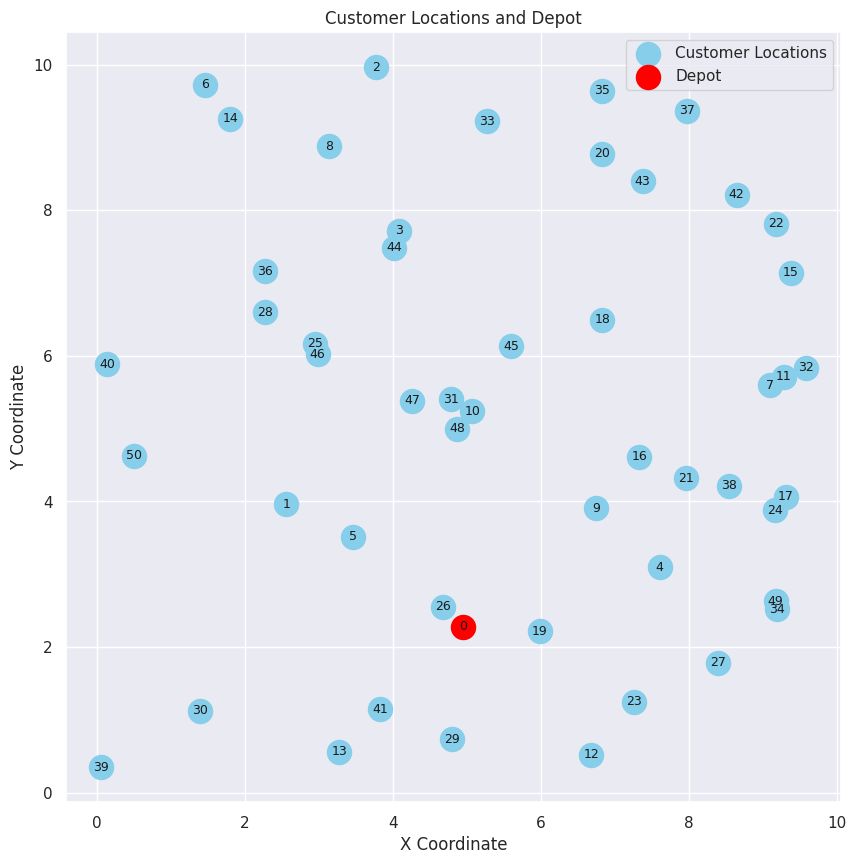

Customers: 50, Total demand: 270, Vehicle capacity: 100, Number of vehicles: 3


In [ ]:
# The following CVRP instance will be solved using three appraches
number_points = 50
number_points, coordinates, demand, vehicle_capacity, num_vehicles = VRP_instance(number_points)
population_size = 50

# Plot for customer locations and depot
plt.figure(figsize=(10, 10))
plt.scatter(coordinates[1:, 0], coordinates[1:, 1], c='skyblue', s=300, label='Customer Locations')  # Larger size for numbering
plt.scatter(coordinates[0, 0], coordinates[0, 1], c='red', s=300, label='Depot', marker='o')      # Larger size for depot

# Number the customers
for i in range(0, number_points + 1):
    plt.text(coordinates[i, 0], coordinates[i, 1], str(i), fontsize=9, ha='center', va='center', color='k')

plt.title('Customer Locations and Depot')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

print(f"Customers: {number_points}, Total demand: {sum(demand)}, Vehicle capacity: {vehicle_capacity}, Number of vehicles: {num_vehicles}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Generation 0: Best Fitness = 0.008584974647725407


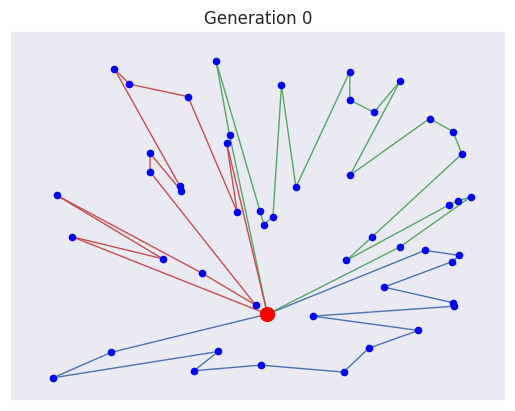

Generation 500: Best Fitness = 0.009700886522189651


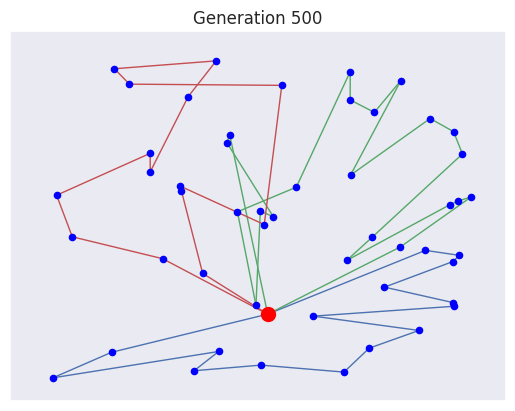

Generation 1000: Best Fitness = 0.009700886522189651


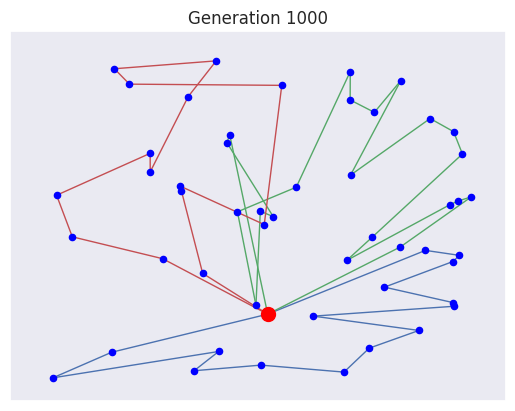

Generation 1500: Best Fitness = 0.009700886522189651


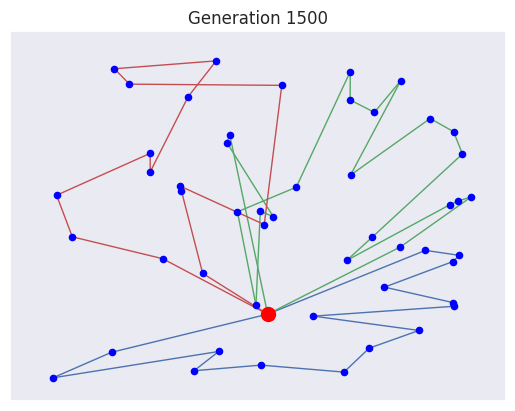

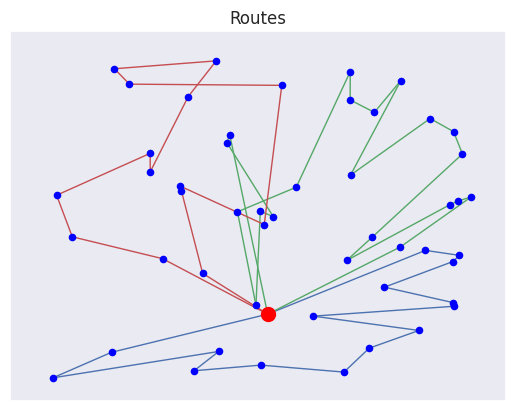

Best Routes: [[0, 30, 39, 41, 13, 29, 12, 23, 27, 19, 34, 49, 4, 24, 17, 38, 0], [0, 21, 32, 11, 7, 9, 16, 15, 22, 42, 18, 37, 43, 20, 35, 45, 47, 26, 31, 10, 44, 3, 0], [0, 1, 50, 40, 36, 28, 8, 2, 6, 14, 33, 48, 25, 46, 5, 0]]
Best Cost: 103.0833623001997


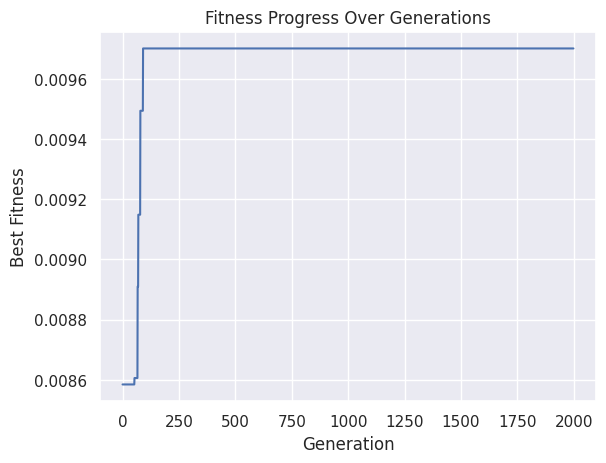

In [ ]:
# Using GA with greedy route splitting and adaptive mutation and elitism

def evaluate_fitness(individual, cost_matrix, demand, vehicle_capacity):
    routes = split_into_routes(individual, demand, vehicle_capacity)
    total_cost = evaluate_solution(routes, cost_matrix)
    return 1 / total_cost

def run_greedy_ga(coordinates, demand, vehicle_capacity, num_vehicles, population_size, num_generations, crossover_rate, initial_mutation_rate):
    num_customers = len(demand) - 1
    cost_matrix = calculate_cost_matrix(coordinates)
    population = initialize_population(population_size, num_customers)

    best_fitness_progress = []
    best_individual = None
    best_fitness = float('-inf')
    mutation_rate = initial_mutation_rate
    min_mutation_rate = 0.05
    evaluation_window = 500
    fitness_evaluation_counter = 0
    previous_best_fitness = float('-inf')

    for generation in range(num_generations):
        fitnesses = [evaluate_fitness(ind, cost_matrix, demand, vehicle_capacity) for ind in population]
        new_population = []

        # Elitism: Copy the best 10% solutions to the next generation
        num_elite = 4
        elite_indices = np.argsort(fitnesses)[-num_elite:]
        elite_individuals = [population[i] for i in elite_indices]
        new_population.extend(elite_individuals)

        # Select the top 50 parents based on fitness
        top_50_indices = np.argsort(fitnesses)[-25:]
        top_50_parents = [population[i] for i in top_50_indices]

        # Create 90% of the new population from the top 50 parents using AEX crossover
        num_children = population_size - num_elite
        for _ in range(num_children // 2):
            parent1 = random.choice(top_50_parents)
            parent2 = random.choice(top_50_parents)
            offspring1 = aex_crossover(parent1, parent2)
            offspring2 = aex_crossover(parent2, parent1)
            new_population.extend([offspring1, offspring2])

        # Apply adaptive mutation to 20% of the children
        num_mutations = int(0.2 * num_children)
        children_indices = random.sample(range(num_elite, population_size), num_mutations)
        for index in children_indices:
            new_population[index] = mutation(new_population[index], mutation_rate)

        population = new_population
        fitnesses = [evaluate_fitness(ind, cost_matrix, demand, vehicle_capacity) for ind in population]

        best_generation_individual = population[np.argmax(fitnesses)]
        best_generation_fitness = max(fitnesses)
        if best_generation_fitness > best_fitness:
            best_individual = best_generation_individual
            best_fitness = best_generation_fitness

        best_fitness_progress.append(best_fitness)

        # Adjust mutation rate based on fitness improvement
        fitness_evaluation_counter += 1
        if fitness_evaluation_counter >= evaluation_window:
            if best_fitness <= previous_best_fitness:
                mutation_rate = max(min_mutation_rate, mutation_rate - 0.05)
            previous_best_fitness = best_fitness
            fitness_evaluation_counter = 0

        if generation % 500 == 0:
            print(f'Generation {generation}: Best Fitness = {best_fitness}')
            plot_routes(best_individual, coordinates, demand, vehicle_capacity, f'Generation {generation}')

    best_routes = split_into_routes(best_individual, demand, vehicle_capacity)
    return best_routes, 1 / best_fitness, best_individual, best_fitness_progress

num_generations = 2000
initial_mutation_rate = 0.5

best_routes, best_cost, best_individual, best_fitness_progress = run_greedy_ga(coordinates, demand, vehicle_capacity, num_vehicles, population_size, num_generations, crossover_rate=0.8, initial_mutation_rate=initial_mutation_rate)

plot_routes(best_individual, coordinates, demand, vehicle_capacity)
print('Best Routes:', best_routes)
print('Best Cost:', best_cost)

plot_fitness_progress(best_fitness_progress)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Generation 0: Best Fitness = 0.008584974647725407


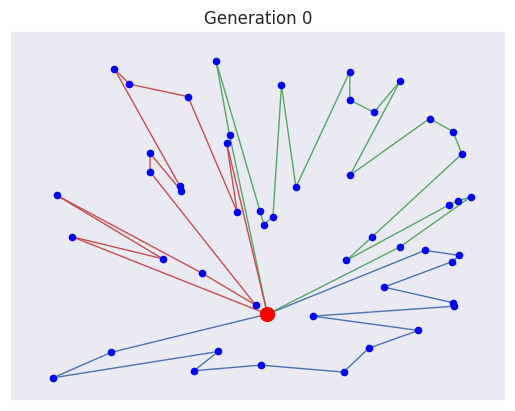

Generation 500: Best Fitness = 0.009279271246917289


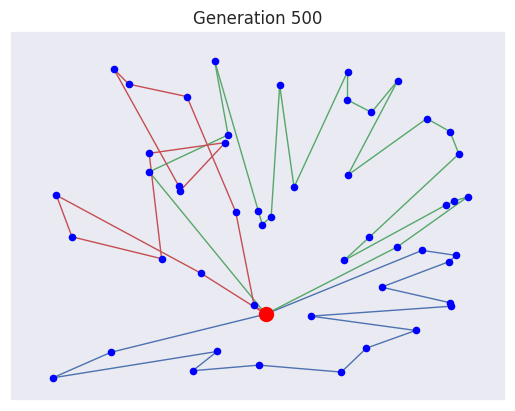

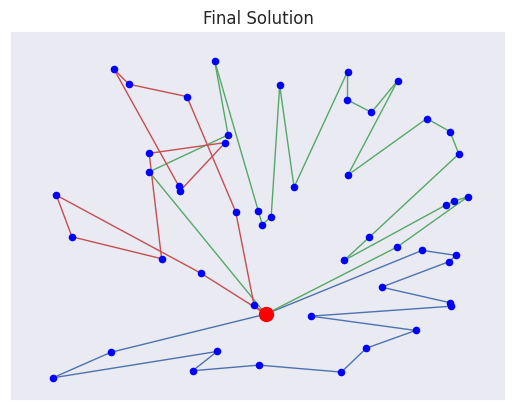

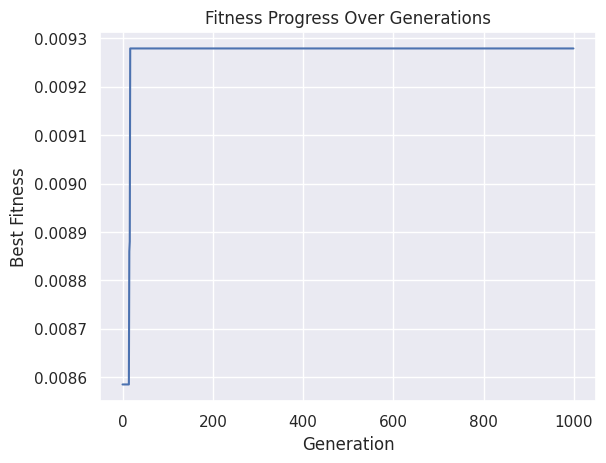

Best cost 107.76708357697969


In [ ]:
# Using GA with dynamicl programming route splitting and adaptive mutation and elitism


def evaluate_fitness_dp(individual, cost_matrix, demand, vehicle_capacity):
    routes, total_cost = split_into_routes_dp(individual, cost_matrix, demand, vehicle_capacity)
    return 1 / total_cost

def selection(population, fitnesses):
    total_fitness = sum(fitnesses)
    probabilities = [fitness / total_fitness for fitness in fitnesses]
    selected_index = np.random.choice(len(population), p=probabilities)
    return population[selected_index]

def run_ga(coordinates, demand, vehicle_capacity, num_vehicles, population_size, num_generations, crossover_rate, initial_mutation_rate):
    num_customers = len(demand) - 1  # excluding depot
    cost_matrix = calculate_cost_matrix(coordinates)
    population = initialize_population(population_size, num_customers)
    best_fitness_progress = []
    best_individual = None
    best_fitness = float('-inf')
    mutation_rate = initial_mutation_rate
    min_mutation_rate = 0.05
    max_no_improvement_iterations = 500
    no_improvement_counter = 0

    for generation in range(num_generations):
        fitnesses = [evaluate_fitness_dp(ind, cost_matrix, demand, vehicle_capacity) for ind in population]

        new_population = []

        # Elitism: Copy the best 10% solutions to the next generation
        elite_size = 4
        elite_indices = np.argsort(fitnesses)[-elite_size:]
        elite_individuals = [population[i] for i in elite_indices]
        new_population.extend(elite_individuals)

        # Create remaining 90% children from the best 50 parent solutions using AEX crossover
        top_half_size = min(25, population_size // 2)
        top_half_indices = np.argsort(fitnesses)[-top_half_size:]
        top_half_population = [population[i] for i in top_half_indices]

        for _ in range((population_size - elite_size) // 2):
            parent1 = selection(top_half_population, [fitnesses[i] for i in top_half_indices])
            parent2 = selection(top_half_population, [fitnesses[i] for i in top_half_indices])
            offspring1 = aex_crossover(parent1, parent2)
            offspring2 = aex_crossover(parent2, parent1)

            if random.random() < 0.2:  # Apply adaptive mutation to 20% of the children
                offspring1 = mutation(offspring1, mutation_rate)
                offspring2 = mutation(offspring2, mutation_rate)

            new_population.extend([offspring1, offspring2])

        population = new_population
        fitnesses = [evaluate_fitness(ind, cost_matrix, demand, vehicle_capacity) for ind in population]

        best_generation_individual = population[np.argmax(fitnesses)]
        best_generation_fitness = max(fitnesses)
        if best_generation_fitness > best_fitness:
            best_individual = best_generation_individual
            best_fitness = best_generation_fitness
            no_improvement_counter = 0
        else:
            no_improvement_counter += 1

        if no_improvement_counter >= max_no_improvement_iterations:
            mutation_rate = max(min_mutation_rate, mutation_rate - 0.05)
            no_improvement_counter = 0

        best_fitness_progress.append(best_fitness)
        if generation % 500 == 0:
            print(f'Generation {generation}: Best Fitness = {best_fitness}')
            plot_routes(best_individual, coordinates, demand, vehicle_capacity, f'Generation {generation}')

    best_routes = split_into_routes_dp(best_individual, cost_matrix, demand, vehicle_capacity)
    return best_routes, 1 / best_fitness, best_individual, best_fitness_progress


num_generations = 1001
crossover_rate = 0.8
initial_mutation_rate = 0.5

best_routes, best_cost, best_individual, best_fitness_progress = run_ga(
    coordinates, demand, vehicle_capacity, num_vehicles, population_size, num_generations, crossover_rate,initial_mutation_rate)

plot_routes(best_individual, coordinates, demand, vehicle_capacity, "Final Solution")
plot_fitness_progress(best_fitness_progress)
print('Best cost',best_cost)

Generation 0: Best Fitness = 0.008584974647725407


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


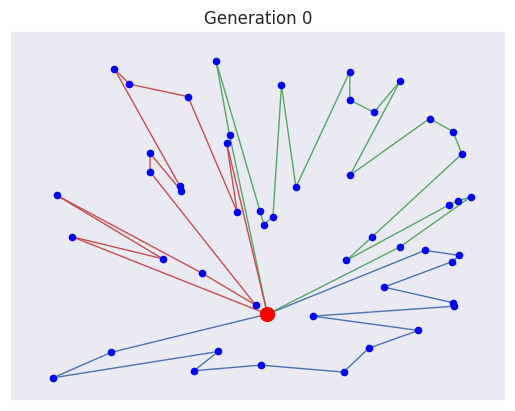

Generation 500: Best Fitness = 0.010919131210604014


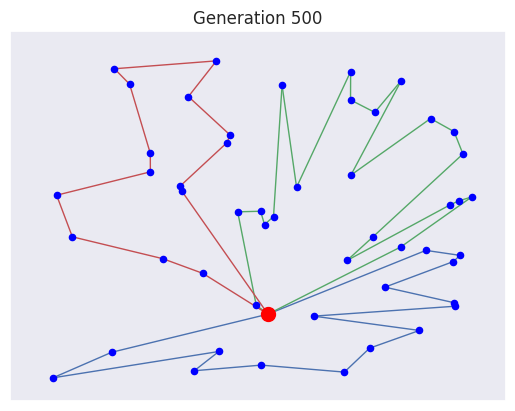

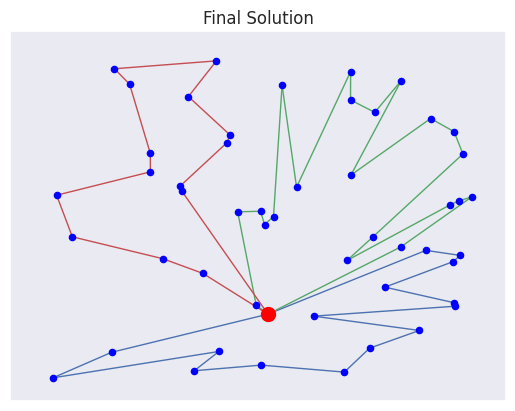

Best Routes: ([[0, 30, 39, 41, 13, 29, 12, 23, 7, 19, 34, 49, 4, 24, 31, 38, 0], [0, 21, 32, 11, 27, 9, 16, 15, 22, 42, 18, 37, 43, 20, 35, 45, 1, 10, 33, 17, 14, 26, 0], [0, 5, 48, 50, 40, 28, 36, 47, 6, 2, 8, 3, 44, 25, 46, 0]], 91.58237782039465)
Best Cost: 91.58237782039465


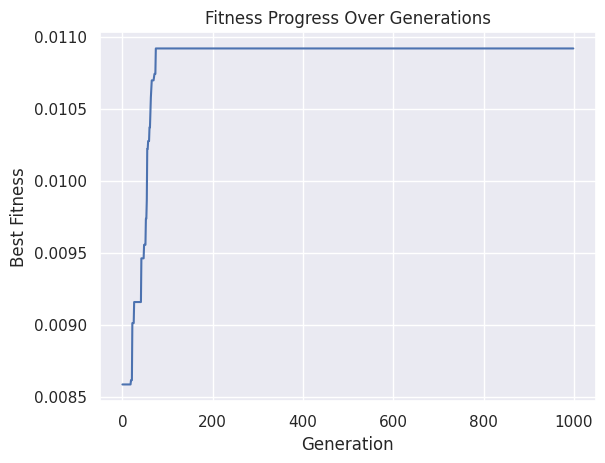

In [ ]:
# Using GA with heiristic route splitting and adaptive mutation and elitism

def evaluate_fitness_heuristic(individual, cost_matrix, demand, vehicle_capacity):
    routes, total_cost = split_into_routes_genetic(individual, cost_matrix, demand, vehicle_capacity)
    return 1 / total_cost


def run_ga_heuristic(coordinates, demand, vehicle_capacity, num_vehicles, population_size, num_generations, crossover_rate, initial_mutation_rate):
    num_customers = len(demand) - 1  # excluding depot
    cost_matrix = calculate_cost_matrix(coordinates)
    population = initialize_population(population_size, num_customers)
    best_fitness_progress = []
    best_individual = None
    best_fitness = float('-inf')
    mutation_rate = initial_mutation_rate
    min_mutation_rate = 0.05
    max_no_improvement_iterations = 500
    no_improvement_counter = 0

    for generation in range(num_generations):
        fitnesses = [evaluate_fitness_heuristic(ind, cost_matrix, demand, vehicle_capacity) for ind in population]

        new_population = []

        # Elitism: Copy the best 10% solutions to the next generation
        elite_size = 4
        elite_indices = np.argsort(fitnesses)[-elite_size:]
        elite_individuals = [population[i] for i in elite_indices]
        new_population.extend(elite_individuals)

        # Create remaining 90% children from the best 50 parent solutions using AEX crossover
        top_half_size = min(25, population_size // 2)
        top_half_indices = np.argsort(fitnesses)[-top_half_size:]
        top_half_population = [population[i] for i in top_half_indices]

        for _ in range((population_size - elite_size) // 2):
            parent1 = selection(top_half_population, [fitnesses[i] for i in top_half_indices])
            parent2 = selection(top_half_population, [fitnesses[i] for i in top_half_indices])
            offspring1 = aex_crossover(parent1, parent2)
            offspring2 = aex_crossover(parent2, parent1)

            if random.random() < 0.2:  # Apply adaptive mutation to 20% of the children
                offspring1 = mutation(offspring1, mutation_rate)
                offspring2 = mutation(offspring2, mutation_rate)

            new_population.extend([offspring1, offspring2])

        population = new_population
        fitnesses = [evaluate_fitness(ind, cost_matrix, demand, vehicle_capacity) for ind in population]

        best_generation_individual = population[np.argmax(fitnesses)]
        best_generation_fitness = max(fitnesses)
        if best_generation_fitness > best_fitness:
            best_individual = best_generation_individual
            best_fitness = best_generation_fitness
            no_improvement_counter = 0
        else:
            no_improvement_counter += 1

        if no_improvement_counter >= max_no_improvement_iterations:
            mutation_rate = max(min_mutation_rate, mutation_rate - 0.05)
            no_improvement_counter = 0

        best_fitness_progress.append(best_fitness)
        if generation % 500 == 0:
            print(f'Generation {generation}: Best Fitness = {best_fitness}')
            plot_routes(best_individual, coordinates, demand, vehicle_capacity, f'Generation {generation}')

    best_routes = split_into_routes_genetic(best_individual, cost_matrix, demand, vehicle_capacity)
    return best_routes, 1 / best_fitness, best_individual, best_fitness_progress



num_generations = 1001
crossover_rate = 0.8
initial_mutation_rate = 0.5

best_routes, best_cost, best_individual, best_fitness_progress = run_ga_heuristic(
    coordinates, demand, vehicle_capacity, num_vehicles, population_size, num_generations, crossover_rate,initial_mutation_rate)

plot_routes(best_individual, coordinates, demand, vehicle_capacity,  "Final Solution")
print('Best Routes:', best_routes)
print('Best Cost:', best_cost)

plot_fitness_progress(best_fitness_progress)